In [1]:
import molmap
import seaborn as sns
import numpy as np
import pandas as pd
from IPython.display import HTML

In [2]:
#select your feature to generate a molmap
#flist = fext().bitsinfo.IDs.sample(12108).tolist()

# init your molmap, your can define your feature by using flist, default all of features are used
mp = molmap.MolMap(ftype = 'descriptor', fmap_type = 'grid', split_channels=False)

In [3]:
mp.fit(method = 'umap', min_dist = 0.1, n_neighbors = 50)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='precomputed',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=50, negative_sample_rate=5, random_state=32,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=2)
Construct fuzzy simplicial set
Mon Oct 14 21:46:32 2019 Finding Nearest Neighbors
Mon Oct 14 21:46:32 2019 Finished Nearest Neighbor Search
Mon Oct 14 21:46:33 2019 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Mon Oct 14 21:46:38 2019 Fini

## save it as a featurizer

In [47]:
mp.save('./descriptor.mp')

['./descriptor.mp']

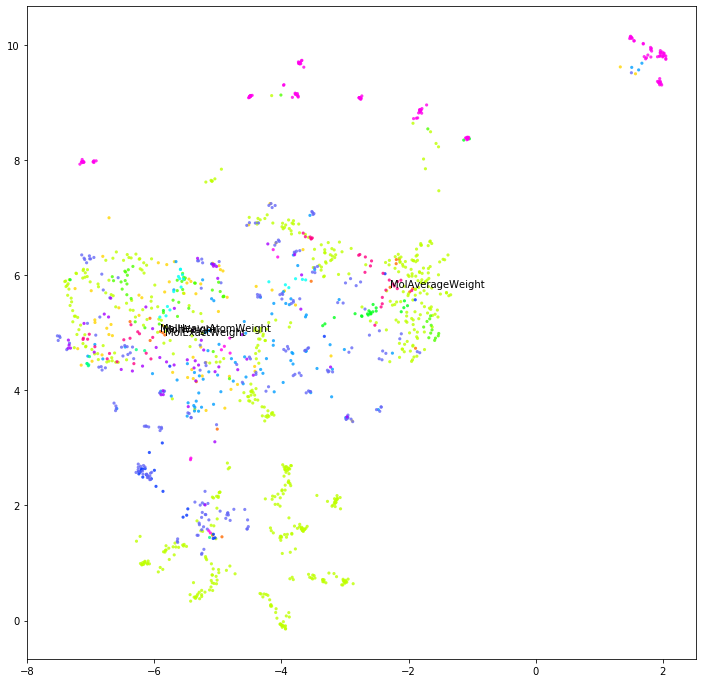

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

embedding = mp.embedded.embedding_
plt.figure(figsize=(12,12))
plt.scatter(embedding[:, 0], embedding[:, 1],
            c=mp.extract.bitsinfo.set_index('IDs').loc[mp.flist].colors.tolist(), 
            edgecolor='none', 
            alpha=0.80, 
            s=10)


import pandas as pd
df = pd.DataFrame(embedding, index = mp.flist, columns = ['x', 'y'])
test = ['MolWeight', 'MolExactWeight', 'MolAverageWeight', 'MolHeavyAtomWeight']
df1 = df.loc[test]
for i in range(len(df1)):
    ts = df1.iloc[i]
    plt.text(ts.x,ts.y,ts.name)
#plt.axis('off')

In [28]:
mp.plot_scatter(htmlpath='./html', htmlname= 'scatter')
mp.plot_grid(htmlpath='./html', htmlname= 'grid')

2019-10-14 22:28:05,892 - INFO - [bidd-molmap] - generate file: ./html/scatter_descriptor_1344_cosine_umap_scatter
2019-10-14 22:28:05,928 - INFO - [bidd-molmap] - save html file to ./html/scatter_descriptor_1344_cosine_umap_scatter
2019-10-14 22:28:05,931 - INFO - [bidd-molmap] - generate file: ./html/grid_descriptor_1344_cosine_umap_molmap
2019-10-14 22:28:05,960 - INFO - [bidd-molmap] - save html file to ./html/grid_descriptor_1344_cosine_umap_molmap


# transoform smiles to images

In [29]:
from rdkit import Chem
from rdkit.Chem import Draw
import seaborn as sns

In [18]:
smoothing = True
sigma = 2
kernel_size = 41
mode = 'same'

smiles_list = ['CC(=O)OC1=CC=CC=C1C(O)=O', 'CC(=O)NC1=CC=CC=C1C(O)=O', 'CC(=O)CC1=CC=CC=C1C(O)=O']
x = mp.batch_transform(smiles_list, scale = True, scale_method = 'standard', 
                       smoothing = smoothing, 
                       kernel_size = kernel_size, 
                       sigma=sigma)

100%|##########| 3/3 [00:00<00:00, 170.47it/s]


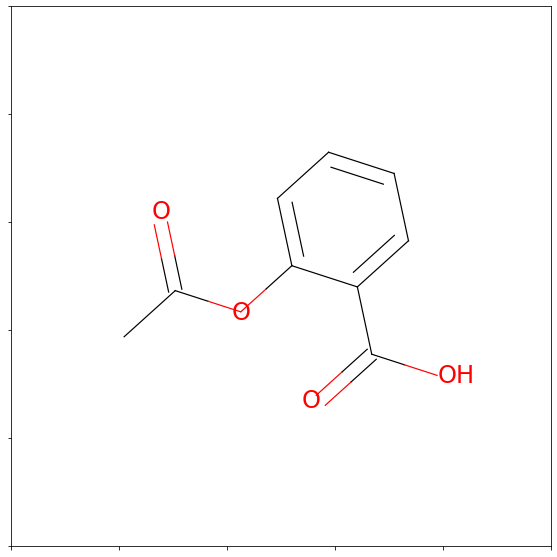

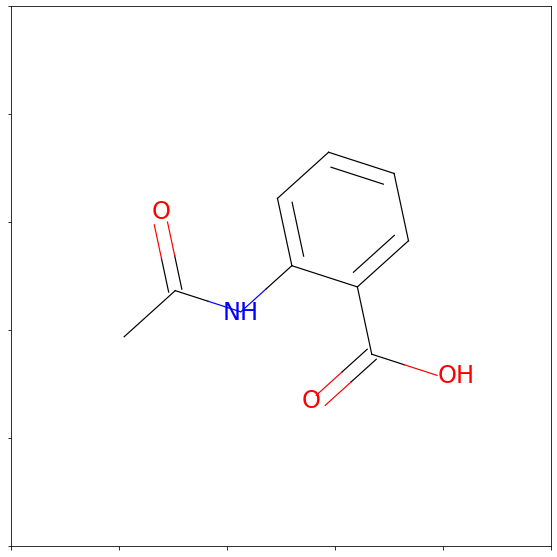

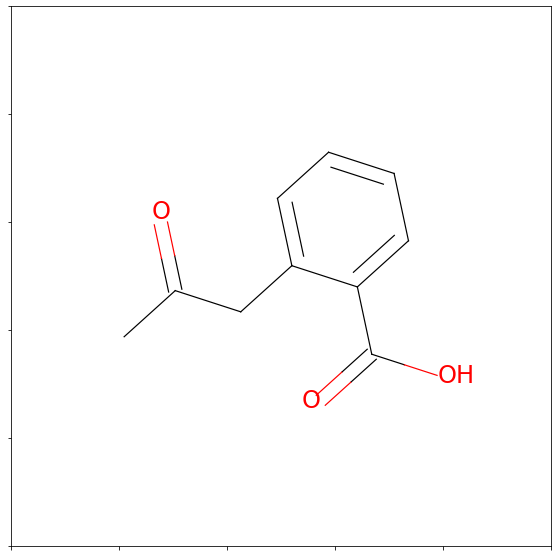

In [45]:
for i, smiles in enumerate(smiles_list):
    fig = Draw.MolToMPL(Chem.MolFromSmiles(smiles), fitImage = True)
    fig.savefig('./results/mol_%s.png' % i, bbox_inches='tight')